In [170]:
import torch
from torch.optim import SGD
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

In [171]:
INPUT_DIMENSION=6
OUTPUT_DIMENSION=1
EPOCHS=500
LR=0.01

In [172]:
X_real=torch.tensor([[1,0,0,0,0,1],
                     [0,-1,0,0,0,-1],
                     [0,0,-1,0,0,-1],
                     [0,0,0,1,0,1],
                     [0,0,0,0,-1,-1]]).float()

y_real=torch.tensor([1,-1,-1,1,-1]).float()

X_random=torch.tensor([[1,0,0,0,0,0],
                       [0,-1,0,0,0,0],
                       [0,0,-1,0,0,0],
                       [0,0,0,1,0,0],
                       [0,0,0,0,-1,0]]).float()

y_random=torch.tensor([1,-1,-1,1,-1]).float()

trainX_real=X_real[0:4]
testX_real=X_real[-1]
trainY_real=y_real[0:4]
testY_real=y_real[-1]

trainX_random=X_random[0:4]
testX_random=X_random[-1]
trainY_random=y_random[0:4]
testY_random=y_random[-1]


In [173]:
class LinearClassifier(torch.nn.Module):
  def __init__(self):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(in_features=INPUT_DIMENSION, out_features=OUTPUT_DIMENSION, bias=False)

  def forward(self, x):
    x = self.linear(x)
    return x

In [174]:
model_real=LinearClassifier()

model_real.linear.weight=torch.nn.Parameter(torch.zeros(INPUT_DIMENSION))

opt = SGD(model_real.parameters(), lr=LR)
lossFunc = nn.MSELoss()

trainLoss_real = []
testLoss_real=[]

w_1_real=[]
w_6_real=[]

for epoch in range(0, EPOCHS):

	w=model_real.linear.weight.detach().numpy()

	w_1_real.append(w[0])
	w_6_real.append(w[-1])

	model_real.train()
	predictions = model_real(trainX_real)
	loss = lossFunc(predictions, trainY_real)
	opt.zero_grad()
	loss.backward()
	opt.step()

	trainLoss_real.append(loss.item())
	
	with torch.no_grad():
		prediction=model_real(testX_real)
		testLoss_real.append(lossFunc(prediction, testY_real).item())
	if epoch%10==9:
		print("Epoch: {} Train Loss: {:.3f} Test Loss: {:.3f}".format(epoch+1,trainLoss_real[-1], testLoss_real[-1]))

Epoch: 10 Train Loss: 0.634 Test Loss: 0.674
Epoch: 20 Train Loss: 0.382 Test Loss: 0.465
Epoch: 30 Train Loss: 0.230 Test Loss: 0.330
Epoch: 40 Train Loss: 0.139 Test Loss: 0.241
Epoch: 50 Train Loss: 0.084 Test Loss: 0.181
Epoch: 60 Train Loss: 0.050 Test Loss: 0.141
Epoch: 70 Train Loss: 0.030 Test Loss: 0.113
Epoch: 80 Train Loss: 0.018 Test Loss: 0.093
Epoch: 90 Train Loss: 0.011 Test Loss: 0.079
Epoch: 100 Train Loss: 0.007 Test Loss: 0.069
Epoch: 110 Train Loss: 0.004 Test Loss: 0.062
Epoch: 120 Train Loss: 0.002 Test Loss: 0.057
Epoch: 130 Train Loss: 0.001 Test Loss: 0.053
Epoch: 140 Train Loss: 0.001 Test Loss: 0.050
Epoch: 150 Train Loss: 0.001 Test Loss: 0.047
Epoch: 160 Train Loss: 0.000 Test Loss: 0.046
Epoch: 170 Train Loss: 0.000 Test Loss: 0.044
Epoch: 180 Train Loss: 0.000 Test Loss: 0.043
Epoch: 190 Train Loss: 0.000 Test Loss: 0.043
Epoch: 200 Train Loss: 0.000 Test Loss: 0.042
Epoch: 210 Train Loss: 0.000 Test Loss: 0.042
Epoch: 220 Train Loss: 0.000 Test Loss: 0.0

In [175]:
model_random=LinearClassifier()

model_random.linear.weight=torch.nn.Parameter(torch.zeros(INPUT_DIMENSION))

opt = SGD(model_random.parameters(), lr=LR)
lossFunc = nn.MSELoss()

trainLoss_random = []
testLoss_random=[]

w_1_random=[]
w_6_random=[]

for epoch in range(0, EPOCHS):

	w=model_random.linear.weight.detach().numpy()

	w_1_random.append(w[0])
	w_6_random.append(w[-1])

	model_random.train()
	predictions = model_random(trainX_random)
	loss = lossFunc(predictions, trainY_random)
	opt.zero_grad()
	loss.backward()
	opt.step()
	
	trainLoss_random.append(loss.item())

	with torch.no_grad():
		prediction=model_random(testX_random)
		testLoss_random.append(lossFunc(prediction, testY_random).item())
	if epoch%10==9:
		print("Epoch: {} Train Loss: {:.3f} Test Loss: {:.3f}".format(epoch+1,trainLoss_random[-1], testLoss_random[-1]))

Epoch: 10 Train Loss: 0.914 Test Loss: 1.000
Epoch: 20 Train Loss: 0.827 Test Loss: 1.000
Epoch: 30 Train Loss: 0.748 Test Loss: 1.000
Epoch: 40 Train Loss: 0.676 Test Loss: 1.000
Epoch: 50 Train Loss: 0.612 Test Loss: 1.000
Epoch: 60 Train Loss: 0.554 Test Loss: 1.000
Epoch: 70 Train Loss: 0.501 Test Loss: 1.000
Epoch: 80 Train Loss: 0.453 Test Loss: 1.000
Epoch: 90 Train Loss: 0.410 Test Loss: 1.000
Epoch: 100 Train Loss: 0.371 Test Loss: 1.000
Epoch: 110 Train Loss: 0.335 Test Loss: 1.000
Epoch: 120 Train Loss: 0.303 Test Loss: 1.000
Epoch: 130 Train Loss: 0.274 Test Loss: 1.000
Epoch: 140 Train Loss: 0.248 Test Loss: 1.000
Epoch: 150 Train Loss: 0.225 Test Loss: 1.000
Epoch: 160 Train Loss: 0.203 Test Loss: 1.000
Epoch: 170 Train Loss: 0.184 Test Loss: 1.000
Epoch: 180 Train Loss: 0.166 Test Loss: 1.000
Epoch: 190 Train Loss: 0.150 Test Loss: 1.000
Epoch: 200 Train Loss: 0.136 Test Loss: 1.000
Epoch: 210 Train Loss: 0.123 Test Loss: 1.000
Epoch: 220 Train Loss: 0.111 Test Loss: 1.0

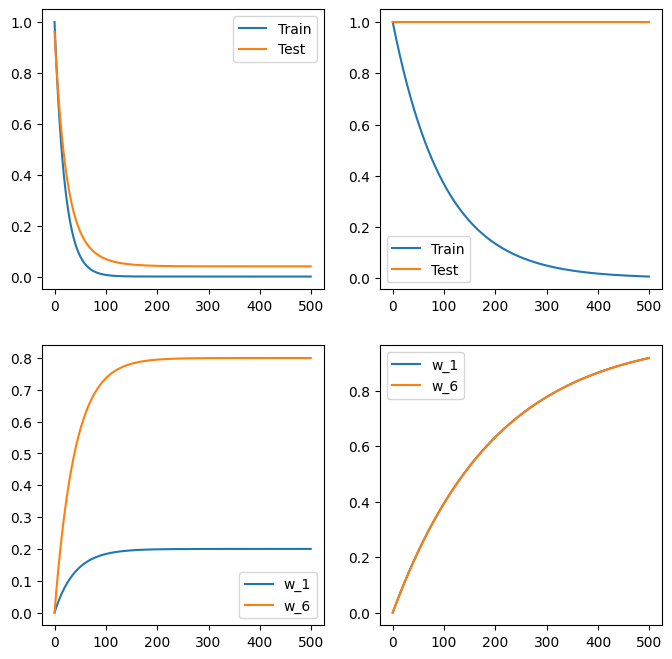

In [176]:
fig, axs = plt.subplots(2,2)

fig.set_size_inches(8,8)

axs[0,0].plot(np.arange(EPOCHS),trainLoss_real,label='Train')
axs[0,0].plot(np.arange(EPOCHS),testLoss_real,label='Test')
axs[0,0].legend()
axs[0,1].plot(np.arange(EPOCHS),trainLoss_random,label='Train')
axs[0,1].plot(np.arange(EPOCHS),testLoss_random,label='Test')
axs[0,1].legend()

axs[1,0].plot(np.arange(EPOCHS),w_1_real,label='w_1')
axs[1,0].plot(np.arange(EPOCHS),w_6_real,label='w_6')
axs[1,0].legend()
axs[1,1].plot(np.arange(EPOCHS),w_1_random,label='w_1')
axs[1,1].plot(np.arange(EPOCHS),w_1_random,label='w_6')
axs[1,1].legend()


plt.show()